<a href="https://colab.research.google.com/github/lucianomcsilva/RIWRS/blob/main/%5BRIWRS%5D_4_An%C3%BAncios_Classificados_do_OLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

Utilizando o conhecimento obtido na trilha 3, obtivemos mais de 75 mil anuncios classificados na secção de cachorros do site OLX Brasil e está disponivel no link 
[texto do link](https://)

## instalando todas as dependencias

In [ ]:
!pip install pandas
!pip install unidecode

     |████████████████████████████████| 235 kB 6.8 MB/s 


## Abrindo a corpora e fazendo inspenção visual

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lucianomcsilva/ANUNCIOS_OLX/main/olx.csv')

titles = df[['title']].copy()
titles.head(10)

,title
0,Bulldog Francês (VARIAS CORES DISPONÍVEIS)
1,Pug Macho disponível pra entrega
2,Lindíssimo filhote de shih tzu machinho Black ...
3,Lindíssimo Filhote de shih tzu machinho com Pe...
4,Filhotes de Rottweiler
5,Rottweiler alto padrão
6,"Yorkshire com pedigree , em loja !!!"
7,Fox Paulistinha alto padrão
8,Filhote de shitzu macho
9,Pug alto padrão


## Nuvem de palavras
Montando uma nuvem de palvras, antes de qualquer pre-tratamento

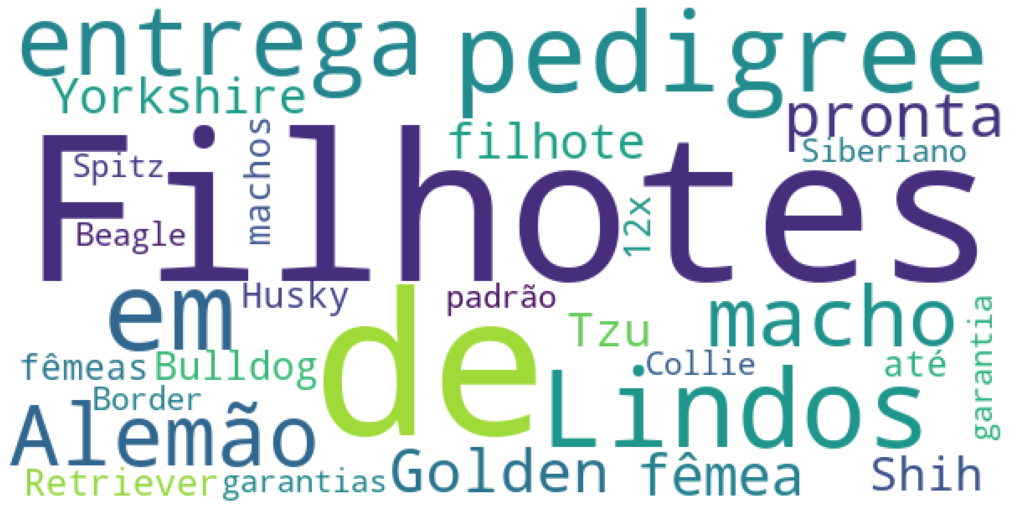

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

original_text = ' '.join(titles['title'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(original_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


# Pré-tratamento
FAzendo os pré-tratamentos explicados no e-book

## Importando a função de singularização

In [ ]:
"""
Thanks for https://simasware.wordpress.com/2014/02/28/pluralizacao-em-pt-br-rails/
"""

import re
import unicodedata
import string

INVARIAVEL = [  'lápis',
                'atlas',
                'pires',
                'ônibus',
                'vírus',
                'bônus',
                'ônus',
                'cais',
                'xis',
                'óculos',
                'ourives',
                'parabéns',
                'atras',

            ]

def singularizar(PalavraOriginal):
    """ Remove acentos e deixa tudo minuscula"""
    palavra = PalavraOriginal.lower()

    # for wd in INVARIAVEL:
    #     if transliterate(wd).lower() == palavra:
    #         return palavra

    """      Lista de regras, composto em tuplas de valor a ser buscado e regra de substituição    """
    rules = []

    """    Palavras terminadas em ns    """
    rules.append((r"^([a-zA-z]*)ns$", r"\1m"))

    """ Palavras terminas em r ou z luzes - luz, flores - flor, arrozes - arroz"""
    rules.append((r"^([a-zA-z]*)res$", r"\1r"))
    rules.append((r"^([a-zA-z]*)zes$", r"\1z"))
    rules.append((r"^([a-zA-z]*)ses$", r"\1s"))

    """    Palavras terminadas em ão    """
    rules.append((r"^([a-zA-z]*)oes$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aos$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aes$", r"\1ao"))

    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|o|u)is$", r"\1\2l"))

    """ Palavras terminas em il  cantis - cantil """
    rules.append((r"^([a-zA-z]*)is$", r"\1il"))

    """ Palavras terminas em les  mal - males, mel - meles """
    rules.append((r"^([a-zA-z]*)les$", r"\1l"))


    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|i|o|u)s$", r"\1\2"))
    
    for rule in rules:
        if re.match(rule[0], palavra) is not None:
            return re.sub(rule[0], rule[1], palavra, 1, re.IGNORECASE)
    return palavra

## Aplicando pré-tratamento

In [ ]:
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import string
nltk.download('stopwords')

stop = stopwords.words('portuguese')

#Transforma em minuscula e remoção de acentos 
#titles['title_treated'] = titles['title'].str.lower().apply(lambda x: unidecode(x))
titles['title_treated'] = titles['title'].apply(lambda x: unidecode(x))

# remocação de pontuaçao
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.punctuation), '')

# remocação de numeros
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada
titles['title_treated'] = titles['title_treated'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))

# Removendo plural
#titles['title_treated'] = titles['title_treated'].apply(lambda x: ' '.join([singularizar(word) for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
titles['title_treated']

0                 Bulldog Frances VARIAS CORES DISPONIVEIS
1                         Pug Macho disponivel pra entrega
2        Lindissimo filhote shih tzu machinho Black whi...
3            Lindissimo Filhote shih tzu machinho Pedigree
4                                      Filhotes Rottweiler
                               ...                        
76638    Yorkshire Terrier Filhotes Garantias saude con...
76639    Maltes Filhotes Garantias saude contrato Macho...
76640    Beagle Filhotes Garantias saude contrato Macho...
76641    Border Collie filhotes disponivel entrega enco...
76642    Lhasa apso adestramento higienico disponiveis ...
Name: title_treated, Length: 76643, dtype: object

## Gerando imagem pós pré-tratamento

### xerentando em forma de tabela primeiro =)

In [ ]:
#cria uma lista com todos os tokens
from nltk.tokenize import word_tokenize
nltk.download('punkt')

big_line = ' '.join(sent for sent in titles['title_treated'])
tokens = word_tokenize(big_line)
fdist1 = nltk.FreqDist(tokens)
fdist1 = sorted(fdist1.items(), key=lambda x: x[1], reverse=True)
pd_freq = pd.DataFrame.from_dict(fdist1)
n = 0
pd_freq.iloc[n:n+20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,0,1
0,filhote,27309
1,femea,10625
2,lindo,9337
3,macho,9247
4,pedigree,8580
5,entrega,7404
6,garantia,6575
7,disponivel,6566
8,alemao,5718
9,pronta,5536


### Nuvem de palavras

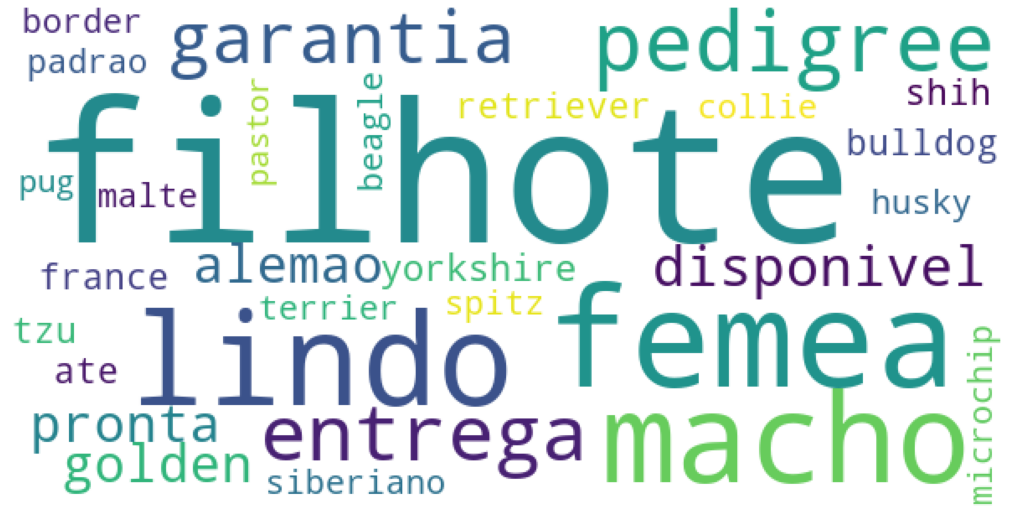

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# from nltk.tokenize import word_tokenize

treated_text = ' '.join(titles['title_treated'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(treated_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## Remoção de palavras ignoradas

In [ ]:
ignorewords = [ 'machinho', 'macho', 'machos', 'femea', 'femeas', 'pedigree', 'pronta', 'pronto', 'prontos', 'entrega', 'lindissimo', 'lindissimos', 
                'lindinhos', 'lindinho', 'lindinhas', 'lindinha',  'lindo', 'lindas', 'fofinhos', 'incriveis', 'lindos', 'linda', 'fofos', 'disponiveis', 'disponivel', 'garantia', 'garantias', 'microchip', 'chip', 'saude', 'hoje', 'suporte', 
                'contrato', 'ate', 'padrao', 'raca', 'racas', 'ja', 'loja', 'dias', 'vendo', 'compro', 'vende', 'compra', 'venda', 'veterinario', 'voce', 'maravilhosos', 'promocao', 
                'vacinados', 'c', 'juros', 'whats', 'whatsapp', 'ligue', 'so', 'total', 'gratuito', 'todas', 'todos', 'todo', 'toda', 'saudaveis', 'saudavel', 'todas', 'pra', 'venha', 
                'clinicas', 'informacoes', 'melhores', 'vida', 'entregamos', 'confira', 'procedencia', 'belos', 'entregamos', 'adquira', 'adquirir', 'disposicao', 'veterinaria', 'vet',
                'tamanho', 'vacinas', 'vacinados', 'vacinada', 'adoraveis', 'adoravel', 'assistencia', 'lojas', 'pura', 'porte',  'parcelamos', 'seguranca', 'chamar', 'condicao', 'condicoes', 'polegadas',
                'perfeitos',  'vet', 'top', 'bem', 'melhor', 'cartao', 'casa', 'garanta', 'capa', 'r', 'amigo', 'amor', 'amoroso', 'amorosos', 'super', 'hiper', 'face', 'contato', 'descricao',
                'imediata', 'aqui', 'alexandre', 'belissimos', 'meses', 'conhecer', 'contato', 'novo', 'vez', 'vezes', 'x', 'docil', 'bebe', 'bebes', 'namorada', 'sp', 'sim', 'nao', 'chame', 'info',
                'companhia', 'varias', 'qualidade', 'companhia', 'procuro', 'vermifugado', 'conferir', 'hrs', 'hora', 'horas', 'ainda', 'unica', 'leia', 'veja', 'veje', 'ver', 'alegria', 'feliz',
                'felicidade', 'procura', 'visitar', 'visita', 'conheca', 'fotos', 'ideal', 'proprias', 'reais', 'transporte', 'puros', 'hs', 'oferecemos', 'lar', 'casa', 'apartamento', 'apto', 'apt',
                'oportunidade', 'companheiro', 'belo', 'vendese', 'reserva', 'reserve', 'pelagem', 'excelente', 'brincalhao', 'sonho', 'preco', 'exclusivas', 'exclusivos', 'exclusiva', 'exclusivo',
                'exclusividade', 'exclusividades', 'beneficios', 'pagamento', 'unico', 'unicos', 'unica', 'unicas', 'sonho', 'servicos', 'otimo', 'otimos', 'otima', 'otimas',
                'dia', 'gratis', 'via', 'fofura', 'retirada', 'parcelamento', 'vai', 'chama', 'cinza', 'preto', 'preta', 'branco', 'chocolate', 'cachorro', 'legitimo', 'cabeca', 'ultimo', 'fisica', 'cabeca', 
               #tamanhos
                'tamanho', 'tamanhos', 'linhagem', 'adulto', 'cm', 'vermifugados', 'vacina', 'canil', 'conosco', 'filhote', 'filhotes', 'filhotinho', 'filhotinhos', 'olhos', 'olho', 'vacinado', 'maravilhoso',
               #cores
                'caramelo', 'amarelo', 'white', 'black', 'vermelho', 'brancochocolate', 'merle', 'merlepreto', 'merlered', 'azul', 'azuis' ]

#titles['title_treated'] = titles['title_treated'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (ignorewords)]))
#titles['title_treated'] = titles['title_treated']

### Nuvem de palavras


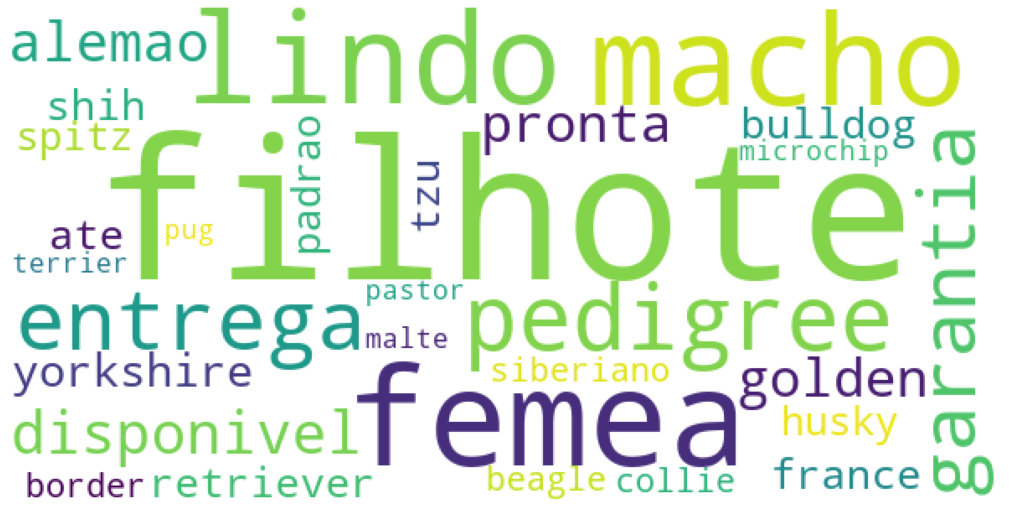

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

treated_text = ' '.join(titles['title_treated'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(treated_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Bigramas
por fim, para conseguir identificar as raças, vamos trabalhar com bigramas, conforme explicado no e-book


# Gerando os bigramas

In [ ]:
from nltk.collocations import *
from nltk import FreqDist
from nltk.util import ngrams    
import collections


treated_text = ' '.join(titles['title_treated'])
bigram_fd = nltk.FreqDist(nltk.bigrams(word_tokenize(treated_text)))

sorted_bgm = sorted(bigram_fd.items(), key=lambda x: x[1], reverse=True)
tokens_bigram = dict((' '.join(text), count) for text, count in sorted_bgm)
# tokens_bigram

In [ ]:
tokens_bigram

## Nuvem de palavras

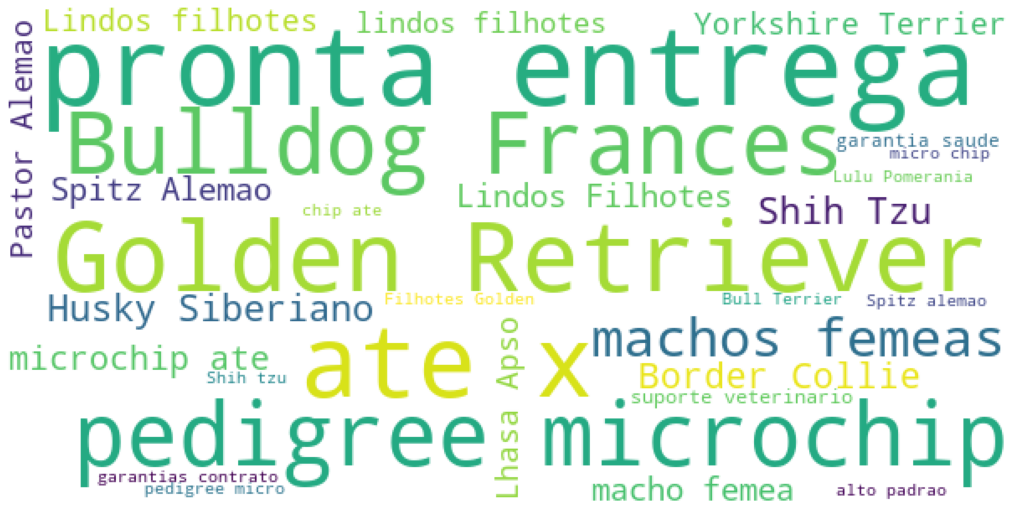

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud4 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate_from_frequencies(tokens_bigram)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()